## Mathematics

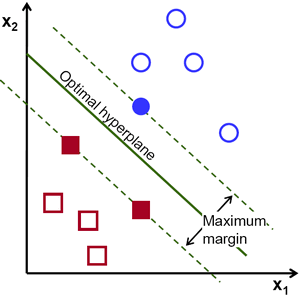

In [1]:
from IPython.display import Image
url = 'https://docs.opencv.org/2.4/_images/optimal-hyperplane.png'
Image(url)

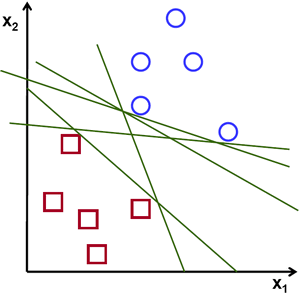

In [2]:
url = 'https://docs.opencv.org/2.4/_images/separating-lines.png'
Image(url)

url = https://en.wikipedia.org/wiki/Support_vector_machine

Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

$$ f(x) = \beta_{0} + \beta^{T} x $$
There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

$$ |\beta_{0} + \beta^{T} x| = 1 $$
where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is:

$$\mathrm{distance} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||}.$$
In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

$$\mathrm{distance}_{\text{ support vectors}} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||} = \frac{1}{||\beta||}$$
Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

$$M = \frac{2}{||\beta||}$$
Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

$$\min_{\beta, \beta_{0}} L(\beta) = \frac{1}{2}||\beta||^{2} \text{ subject to } y_{i}(\beta^{T} x_{i} + \beta_{0}) \geq 1 \text{ } \forall i$$
where yi represents each of the labels of the training examples.

This is a problem of Lagrangian optimization that can be solved using Lagrange multipliers to obtain the weight vector Beta and the bias Beta0 of the optimal hyperplane.

If we want to do non-linear classification we can employ the kernel trick. Using the kernel trick we can "slice" the feature space with a Hyperplane. For a quick illustraion of what this looks like, check out both the image and the video below!

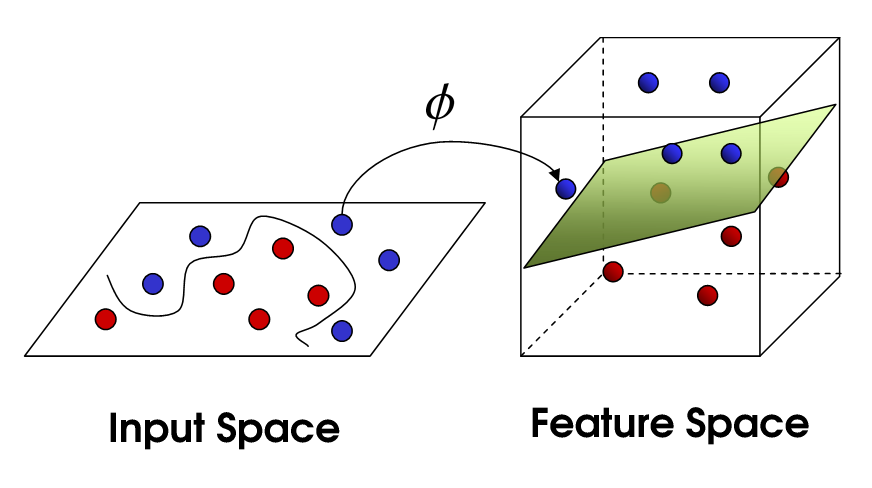

In [3]:
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

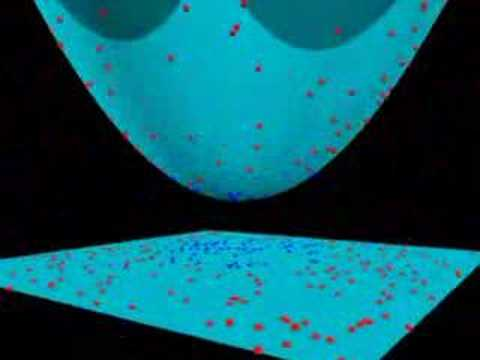

In [4]:
# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## More Resources

In [5]:
# Andrew Ng Lecture
YouTubeVideo('qdnT_jGTg2s')

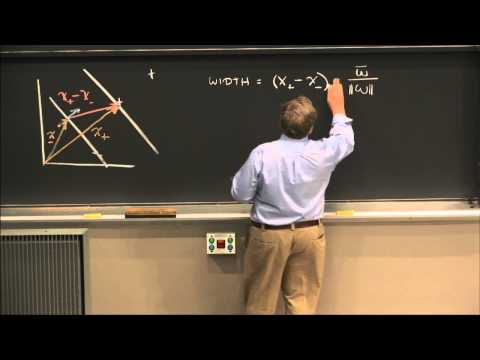

In [6]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')

---

## Coding

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
iris = datasets.load_iris()

X_fts = iris.data
y_trgt = iris.target

In [9]:
model = SVC()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, test_size=.4, random_state=3)

In [11]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predicted = model.predict(X_test)
expected = y_test

In [13]:
# comparing the predicted and actual scores
print(metrics.accuracy_score(expected, predicted))

0.966666666667


In [14]:
ranges_test_size = np.arange(0.2, 1.0, 0.1)
random_state = np.arange(1,7,1)

- ** Splitting the date with many test size and random state parameters**

In [15]:
list_of_vals = []

for i in ranges_test_size:
    for j in random_state:
        X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, test_size=i, random_state=j)
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        expected = y_test
        list_of_vals.append(['Test Size:',i, 'State:', j, metrics.accuracy_score(expected, predicted)])

In [16]:
list_of_vals[0:10]

[['Test Size:', 0.20000000000000001, 'State:', 1, 0.96666666666666667],
 ['Test Size:', 0.20000000000000001, 'State:', 2, 0.96666666666666667],
 ['Test Size:', 0.20000000000000001, 'State:', 3, 1.0],
 ['Test Size:', 0.20000000000000001, 'State:', 4, 0.96666666666666667],
 ['Test Size:', 0.20000000000000001, 'State:', 5, 0.96666666666666667],
 ['Test Size:', 0.20000000000000001, 'State:', 6, 1.0],
 ['Test Size:', 0.30000000000000004, 'State:', 1, 0.97826086956521741],
 ['Test Size:', 0.30000000000000004, 'State:', 2, 1.0],
 ['Test Size:', 0.30000000000000004, 'State:', 3, 0.97826086956521741],
 ['Test Size:', 0.30000000000000004, 'State:', 4, 0.97826086956521741]]

---

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [17]:
from sklearn import svm

In [18]:
X = iris.data[:,:2] # only first two features
y = iris.target

In [19]:
C = 1.0

In [20]:
svc = svm.SVC(kernel='linear',C=C).fit(X,y)

In [21]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C ).fit(X,y)

In [22]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,y)

In [23]:
lin_svc = svm.LinearSVC(C=C).fit(X,y)

In [24]:
# Mesh grid

h = 0.2
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [25]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

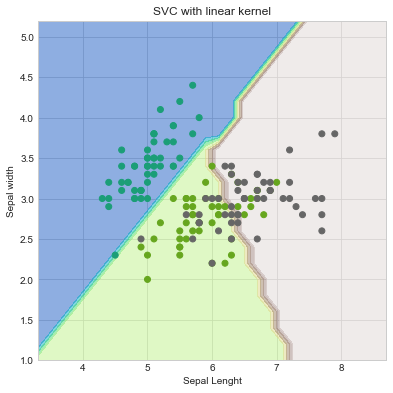

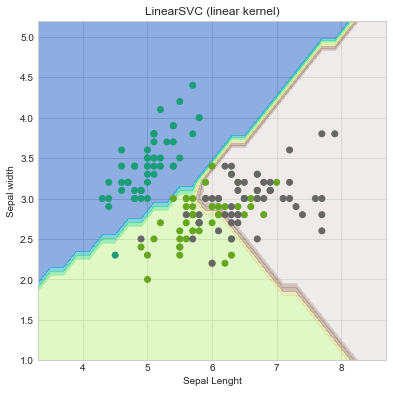

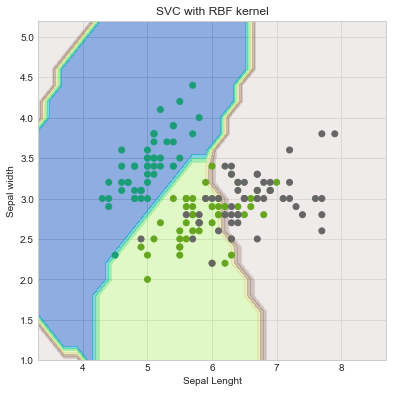

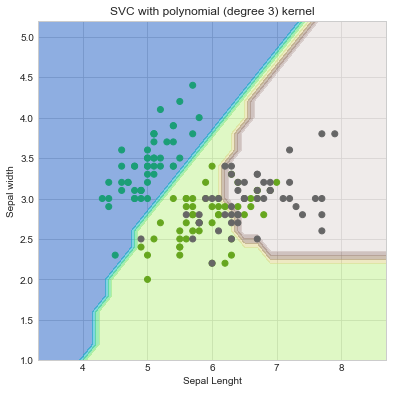

In [26]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain, alpha=0.5)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Dark2)
    plt.xlabel('Sepal Lenght')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])
    
    

---

## Resources

- [Microsoft](https://www.microsoft.com/en-us/research/publication/a-tutorial-on-support-vector-machines-for-pattern-recognition/?from=http%3A%2F%2Fresearch.microsoft.com%2Fpubs%2F67119%2Fsvmtutorial.pdf)
- [Wikipedia: Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function)
- [Statsoft](http://www.statsoft.com/Textbook/Support-Vector-Machines)
- [Scikit](http://scikit-learn.org/stable/modules/svm.html)
- [Wikipedia: SVM](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Columbia: SVM](http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf)
- [Andrew Ng: SVM](http://cs229.stanford.edu/notes/cs229-notes3.pdf)